<a href="https://colab.research.google.com/github/snousind/Social-Media-Analysis/blob/Facebook/Facebook_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_excel('facebook.xlsx')
df

,title,content,from,in,date,images,url,by,comments,hits,likes,shares,loves,wows,hahas,sads,angrys,thankfuls,supports,byImageUrl
0,NaN,Visit us at https://asiatimes.com/Premium con...,Asia Times,NaN,2022-12-22 16:24:43,"[""https://external-sin6-1.xx.fbcdn.net/emg1/v/...",https://www.facebook.com/asiatimesonline/posts...,Asia Times,0.0,NaN,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/186423081422922/pic...
1,NaN,"With a capacity of over 68,000 seats, Al Bayt ...",HISTORY,NaN,2022-12-09 18:00:00,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t15.5...",https://www.facebook.com/HISTORYasia/posts/101...,HISTORY,3.0,NaN,177.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/285783598753/pictur...
2,NaN,Visit us at https://asiatimes.com/Premium con...,Asia Times,NaN,2022-11-16 13:24:45,"[""https://external-sin6-4.xx.fbcdn.net/emg1/v/...",https://www.facebook.com/asiatimesonline/posts...,Asia Times,0.0,NaN,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/186423081422922/pic...
3,NaN,What a game! #Argentina defeated the defending...,Hisense,NaN,2022-12-19 08:23:59,"[""https://scontent-nrt1-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/HisenseGlobal/posts/5...,Hisense,8.0,NaN,193.0,13.0,16.0,0.0,1.0,0.0,2.0,0.0,NaN,https://graph.facebook.com/492483184105033/pic...
4,NaN,UPDATE: Spain run riot over Costa Rica to go t...,Daily Monitor,NaN,2022-11-24 02:01:26,"[""https://scontent-nrt1-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/DailyMonitor/posts/10...,Daily Monitor,13.0,NaN,228.0,2.0,3.0,6.0,2.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/105583497196/pictur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,TUDN MEX──在 2022 FIFA World Cup Qatar 。,� Un XI alternativo que no podrá estar en Qata...,TUDN MEX,NaN,2022-11-18 01:51:57,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/tudnmex/posts/1016059...,TUDN MEX,1831.0,NaN,4190.0,521.0,765.0,46.0,256.0,2233.0,64.0,0.0,NaN,https://graph.facebook.com/22653382339/picture...
17148,NaN,�� ��� ��� ������� ��?Qatar University announc...,TUDN USA,NaN,2022-12-29 01:35:47,"[""https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...",https://www.facebook.com/tudnusa/posts/1016059...,TUDN USA,43.0,NaN,111.0,4.0,17.0,2.0,54.0,0.0,0.0,0.0,NaN,https://graph.facebook.com/173155703431/pictur...
17149,NaN,There were allegations that World Cup host Qat...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17150,NaN,Recent reports indicate he will receive around...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['title', 'in', 'images', 'url', 'hits', 'supports', 'byImageUrl', 'thankfuls'], axis=1)

In [ ]:
df = df.drop([17151,17150,17149])

In [ ]:
df.isna().sum()

content     0
from        0
date        0
by          0
comments    0
likes       0
shares      0
loves       0
wows        0
hahas       0
sads        0
angrys      0
dtype: int64

In [ ]:
df.dtypes

content             object
from                object
date        datetime64[ns]
by                  object
comments           float64
likes              float64
shares             float64
loves              float64
wows               float64
hahas              float64
sads               float64
angrys             float64
dtype: object

In [ ]:
df.columns

Index(['content', 'from', 'date', 'by', 'comments', 'likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys'],
      dtype='object')

In [ ]:
columns_aggr = ['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']

# Create a new column with the sum of selected columns
df['interactions'] = df[columns_aggr].sum(axis=1)

In [ ]:
reacts_sorted = df.sort_values(by='interactions', ascending = False)

In [ ]:
reacts_sorted

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
9286,We've had some special opening ceremonies �Can...,FIFA World Cup,2022-11-20 03:21:32,FIFA World Cup,48691.0,3656165.0,339926.0,1167869.0,14544.0,12343.0,2212.0,3738.0,5196797.0
10999,Can't wait for this great World Cup semi-final...,Mesut Özil,2022-12-15 02:20:37,Mesut Özil,54445.0,1779102.0,29761.0,868409.0,1603.0,6512.0,1727.0,392.0,2687506.0
14934,"Son muchos los recuerdos, buenos momentos y no...",Leo Messi,2022-11-22 04:06:08,Leo Messi,65977.0,527424.0,36493.0,513938.0,681.0,4366.0,802.0,217.0,1083921.0
10461,World Cup final � @cruzbeckhamRoad to 2022 #fi...,David Beckham,2022-12-18 23:07:03,David Beckham,7642.0,814887.0,6148.0,177540.0,679.0,514.0,60.0,153.0,999981.0
7237,Thank you for an unforgettable visit and a Wor...,Zlatan Ibrahimović,2022-12-22 00:08:16,Zlatan Ibrahimović,10244.0,713547.0,3239.0,166533.0,529.0,1429.0,99.0,253.0,885629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,As Qatar welcomes more than a million fans for...,Bristol Herald Courier,2022-11-28 22:37:02,Bristol Herald Courier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10970,The Qatar World Cup should be a watershed mome...,Guardian US sports,2022-12-20 16:06:07,Guardian US sports,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,#Arab Fans In #Qatar Rally Behind #MoroccoArab...,Kashmir Observer,2022-12-06 01:45:31,Kashmir Observer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,Football v soccer: can the World Cup win a US ...,Media Guardian,2022-11-23 18:10:35,Media Guardian,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"There are {len(df['by'].unique())} different people/pages that posted on facebook in this dataset")

There are 2215 different people/pages that posted on facebook in this dataset


In [ ]:
df['date'] = df['date'].dt.date

In [ ]:
df['content'] = df['content'].str.lower()

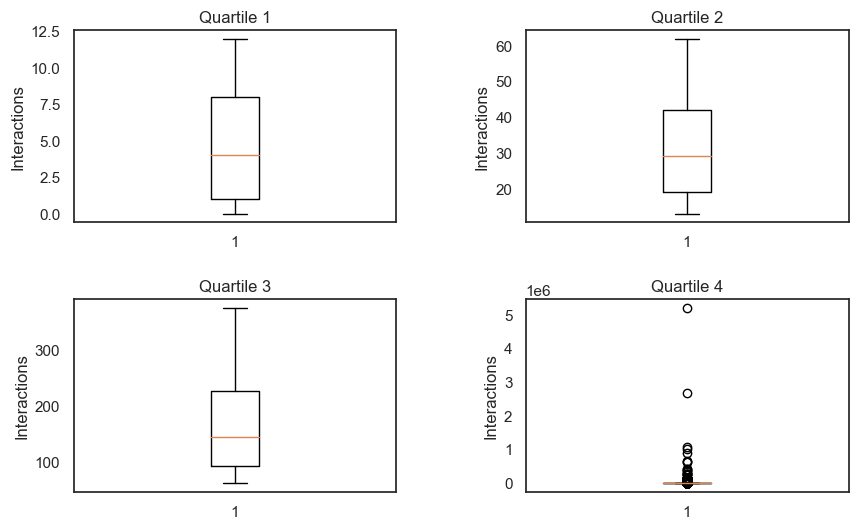

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Calculate quartiles
q1 = reacts_sorted['interactions'].quantile(0.25)
q2 = reacts_sorted['interactions'].quantile(0.5)
q3 = reacts_sorted['interactions'].quantile(0.75)

# Create boxplots for each quartile
axes[0, 0].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] <= q1])
axes[0, 0].set_title('Quartile 1')
axes[0, 1].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q1) & (reacts_sorted['interactions'] <= q2)])
axes[0, 1].set_title('Quartile 2')
axes[1, 0].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q2) & (reacts_sorted['interactions'] <= q3)])
axes[1, 0].set_title('Quartile 3')
axes[1, 1].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] > q3])
axes[1, 1].set_title('Quartile 4')

# Set y-axis labels
for ax in axes.flat:
    ax.set_ylabel('Interactions')

# Show the plot
plt.show()

In [ ]:
correlation_matrix = df[['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']].corr()

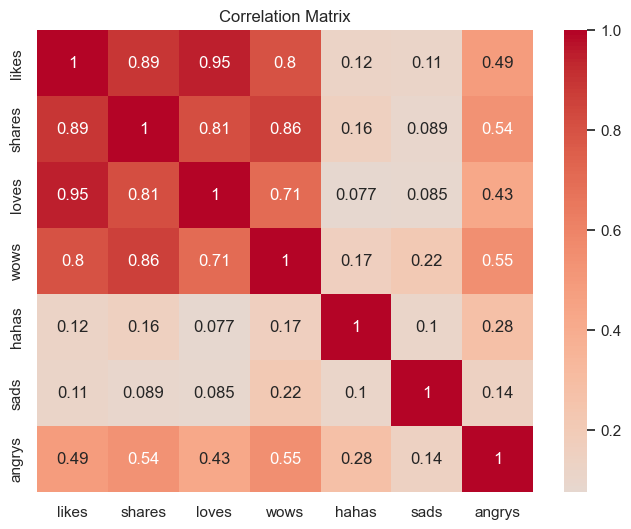

In [ ]:
sns.set(style='white')  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
from unidecode import unidecode
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
for i in range(len(df['content'])):
    df['content'].loc[i] = unidecode(df['content'].loc[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\macka\AppData\Local\Temp\ipykernel_11112\517759990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'].loc[i] = unidecode(df['content'].loc[i])


In [ ]:
df['content'] = df['content'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

In [ ]:
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['content'] = df['content'].apply(remove_punctuation)
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0


In [ ]:
players = pd.read_csv('player_shooting.csv')

In [ ]:
players = players['player'].tolist()

In [ ]:
surnames = [' '.join(names.split()[1:]) if len(names.split()) > 1 else names for names in players]
surnames = [string.lower() for string in surnames]
for i in range(len(surnames)):
    surnames[i] = unidecode(surnames[i])

In [ ]:
from collections import Counter

In [ ]:
all_words = []
for string in df['content']:
    words = string.split()  # Split the string into words
    all_words.extend(words)

In [ ]:
word_counts = Counter(all_words)

In [ ]:
word_counts.most_common()

[('world', 31433),
 ('cup', 28723),
 ('qatar', 21202),
 ('s', 14678),
 ('fifa', 8937),
 ('2022', 8329),
 ('argentina', 4010),
 ('football', 3870),
 ('fans', 3328),
 ('team', 2963),
 ('match', 2707),
 ('https', 2531),
 ('messi', 2518),
 ('england', 2490),
 ('tournament', 2375),
 ('first', 2354),
 ('france', 2330),
 ('final', 2144),
 ('vs', 2132),
 ('Shi', 2118),
 ('win', 2114),
 ('soccer', 2090),
 ('one', 1950),
 ('group', 1915),
 ('brazil', 1807),
 ('De', 1773),
 ('Xiang', 1734),
 ('game', 1677),
 ('nt', 1664),
 ('live', 1659),
 ('morocco', 1575),
 ('fifaworldcup', 1561),
 ('stadium', 1542),
 ('players', 1535),
 ('time', 1466),
 ('us', 1416),
 ('country', 1384),
 ('Pian', 1331),
 ('said', 1317),
 ('last', 1314),
 ('lionel', 1300),
 ('qatar2022', 1297),
 ('host', 1267),
 ('news', 1187),
 ('sports', 1181),
 ('opening', 1129),
 ('watch', 1108),
 ('doha', 1092),
 ('two', 1087),
 ('rights', 1064),
 ('national', 1061),
 ('croatia', 1053),
 ('sunday', 1028),
 ('japan', 1018),
 ('Yi', 960),
 (

In [ ]:
sorted_surnames = sorted(surnames, key=lambda word: word_counts.get(word, 0), reverse=True)

print("Most trending player:", sorted_surnames[0])
print("Number of mentions:", word_counts[sorted_surnames[0]])

Most trending player: messi
Number of mentions: 2518


In [ ]:
top_trenders = sorted_surnames[0:10]

In [ ]:
name_mentions = []
for i in range(10):
    name_mentions.append(word_counts[sorted_surnames[i]])

In [ ]:
name_mentions

[2518, 825, 616, 345, 324, 262, 199, 163, 163, 163]

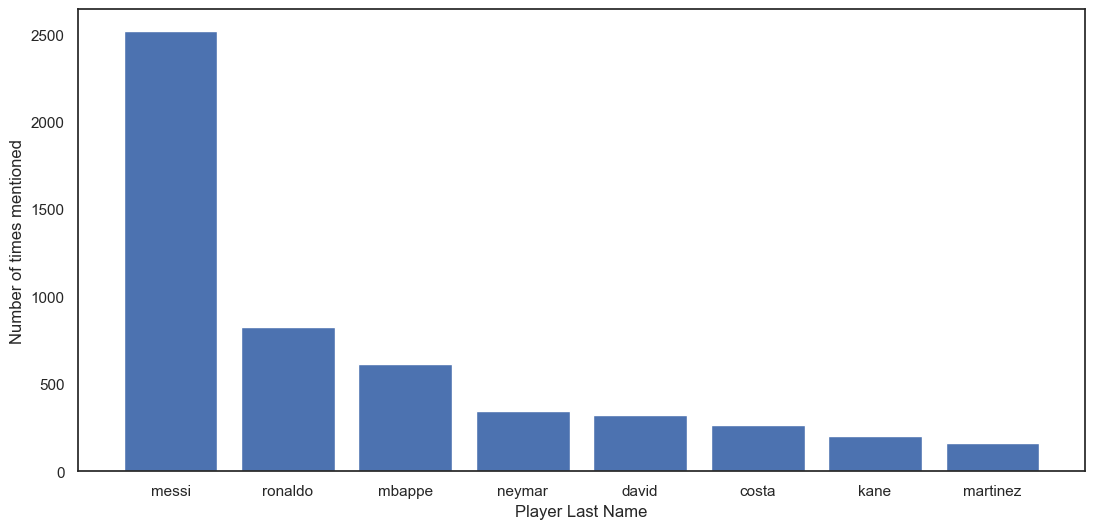

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.bar(top_trenders, name_mentions)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.show()

In [ ]:
word_counts['mbappe']

616

In [ ]:
word_counts['mbappé']

0

In [ ]:
df

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17144,via el pais english edition fifa s referees c...,EL PAÍS México,2022-11-23,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17145,two weeks fifa president gianni infantino tak...,EL PAÍS México,2022-11-12,EL PAÍS México,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17146,escucha en apple music hayya hayya better to...,MacStore México,2022-11-29,MacStore México,7.0,4.0,0.0,2.0,0.0,0.0,0.0,6.0,12.0
17147,un xi alternativo que podra estar en qatar 202...,TUDN MEX,2022-11-18,TUDN MEX,1831.0,4190.0,521.0,765.0,46.0,256.0,2233.0,64.0,8075.0


In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")

In [ ]:
facebook_pre = df[(df['date'] <= '2022-11-19')]
facebook_during = df[(df['date'] >= '2022-11-20') & (df['date'] <= '2022-12-18')]
facebook_post = df[(df['date'] >= '2022-12-19')]

In [ ]:
all_words_pre = []
for string in facebook_pre['content']:
    words = string.split()  # Split the string into words
    all_words_pre.extend(words)
word_counts_pre = Counter(all_words_pre)
sorted_surnames_pre = sorted(surnames, key=lambda word: word_counts_pre.get(word, 0), reverse=True)
top_trenders_pre = sorted_surnames_pre[0:10]
name_mentions_pre = []
for i in range(10):
    name_mentions_pre.append(word_counts_pre[sorted_surnames_pre[i]])

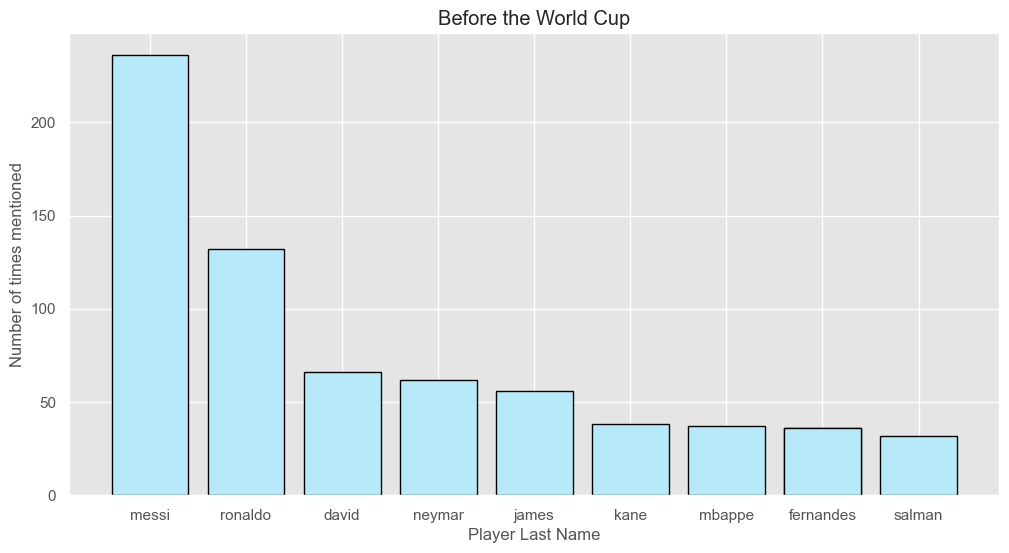

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.bar(top_trenders_pre, name_mentions_pre, color = '#B6EAFA', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("Before the World Cup")
plt.show()

In [ ]:
all_words_during = []
for string in facebook_during['content']:
    words = string.split()  # Split the string into words
    all_words_during.extend(words)
word_counts_during = Counter(all_words_during)
sorted_surnames_during = sorted(surnames, key=lambda word: word_counts_during.get(word, 0), reverse=True)
top_trenders_during = sorted_surnames_during[0:10]
name_mentions_during = []
for i in range(10):
    name_mentions_during.append(word_counts_during[sorted_surnames_during[i]])

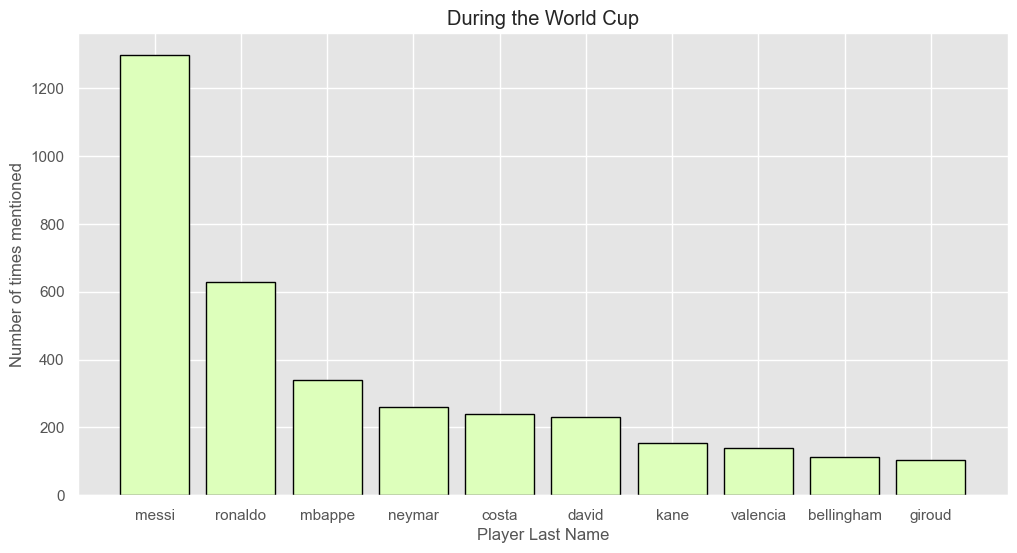

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(top_trenders_during, name_mentions_during, color = '#DDFFBB', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("During the World Cup")
plt.show()

In [ ]:
all_words_post = []
for string in facebook_post['content']:
    words = string.split()  # Split the string into words
    all_words_post.extend(words)
word_counts_post = Counter(all_words_post)
sorted_surnames_post = sorted(surnames, key=lambda word: word_counts_post.get(word, 0), reverse=True)
top_trenders_post = sorted_surnames_post[0:10]
name_mentions_post = []
for i in range(10):
    name_mentions_post.append(word_counts_post[sorted_surnames_post[i]])

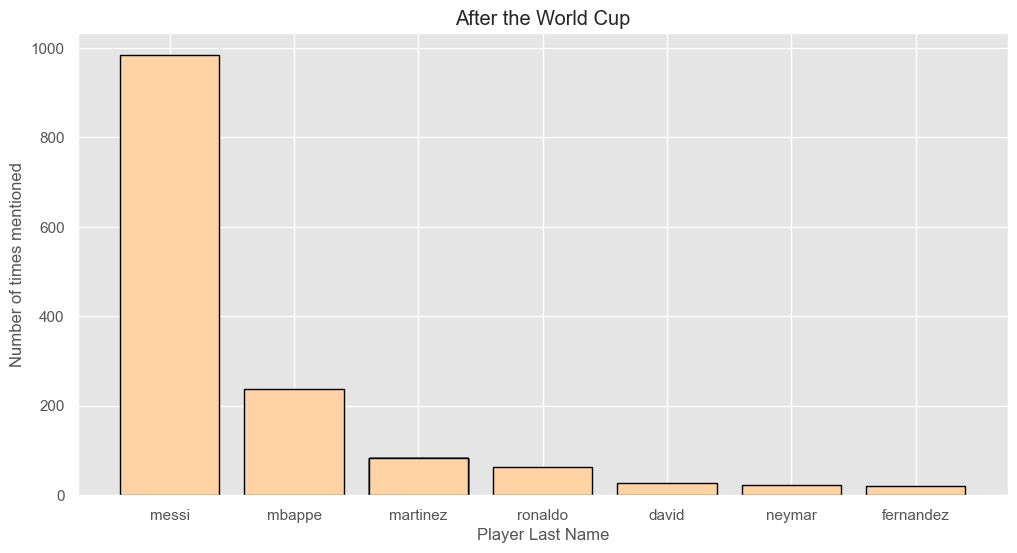

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(top_trenders_post, name_mentions_post, color = '#FFD3A3', edgecolor='black', linewidth=1)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.title("After the World Cup")
plt.show()

In [ ]:
print(sorted_surnames_post)

['messi', 'mbappe', 'martinez', 'martinez', 'martinez', 'martinez', 'ronaldo', 'david', 'neymar', 'fernandez', 'varane', 'reyna', 'lloris', 'mohammed', 'alvarez', 'alvarez', 'alvarez', 'jesus', 'hakimi', 'alves', 'gakpo', 'hassan', 'bale', 'ali', 'kane', 'modric', 'doan', 'saliba', 'nagatomo', 'tchouameni', 'ounahi', 'phillips', 'coman', 'suarez', 'cash', 'salman', 'bounou', 'silva', 'silva', 'silva', 'montiel', 'ziyech', 'ahmed', 'grealish', 'saiss', 'amrabat', 'silva', 'adams', 'mckennie', 'sabiri', 'dari', 'onana', 'onana', 'antony', 'saka', 'james', 'ochoa', 'souttar', 'felix', 'bellingham', 'havertz', 'thuram', 'giroud', 'raphinha', 'richarlison', 'weghorst', 'jabrane', 'tielemans', 'rabiot', 'mabil', 'guesung', 'romero', 'montes', 'nunez', 'camavinga', 'williams', 'cummings', 'stones', 'paredes', 'rashford', 'martinelli', 'williams', 'williams', 'mazraoui', 'dembele', 'pedro', 'lewandowski', 'taniguchi', 'kubo', 'tomiyasu', 'guimaraes', 'roberts', 'upamecano', 'costa', 'dalot', '